In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Now, your Google Drive is mounted at /content/gdrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import zipfile
import os

def unzip_dataset(zip_file_path, extract_to):

    # Create the extraction directory if it doesn't exist
    os.makedirs(extract_to, exist_ok=True)

    # Open the ZIP file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all contents to the specified directory
        zip_ref.extractall(extract_to)

    print("Dataset has been successfully extracted to:", extract_to)

# Example usage:
zip_file_path = '/content/gdrive/MyDrive/PlantVillage.zip'  # Replace with the path to your ZIP file
extract_to = '/content/extracted_potato'   # Replace with the directory to extract the contents to
unzip_dataset(zip_file_path, extract_to)


Dataset has been successfully extracted to: /content/extracted_potato


In [3]:
import zipfile
import os

def unzip_dataset(zip_file_path, extract_to):

    # Create the extraction directory if it doesn't exist
    os.makedirs(extract_to, exist_ok=True)

    # Open the ZIP file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all contents to the specified directory
        zip_ref.extractall(extract_to)

    print("Dataset has been successfully extracted to:", extract_to)

# Example usage:
zip_file_path = '/content/gdrive/MyDrive/Tomato data.zip'  # Replace with the path to your ZIP file
extract_to = '/content/extracted_tomato'   # Replace with the directory to extract the contents to
unzip_dataset(zip_file_path, extract_to)


Dataset has been successfully extracted to: /content/extracted_tomato


In [4]:

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 20
NUM_CLASSES_POTATO = 3  # Number of classes for potato dataset
NUM_CLASSES_TOMATO = 4  # Number of classes for tomato dataset

POTATO_DATASET_PATH = "/content/extracted_potato/PlantVillage"
TOMATO_DATASET_PATH = "/content/extracted_tomato/Tomato data"

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [8]:
# Define a function to create and compile the model
def create_model(num_classes):
    resize_and_rescale = tf.keras.Sequential([
        layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
        layers.experimental.preprocessing.Rescaling(1.0/255)
    ])

    data_augmentation = tf.keras.Sequential([
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        layers.experimental.preprocessing.RandomRotation(0.2)
    ])

    input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
    model = models.Sequential([
        resize_and_rescale,
        data_augmentation,
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape, padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax'),
    ])

    model.build(input_shape=input_shape)
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=['accuracy']
    )

    return model


In [6]:
# Load and preprocess the potato dataset
potato_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    POTATO_DATASET_PATH,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    labels='inferred',
    label_mode='int',
)

Found 2152 files belonging to 3 classes.


In [7]:
# Split the potato dataset into training, validation, and test sets
potato_train_ds, potato_val_ds, potato_test_ds = get_dataset_partitions_tf(potato_dataset)

# Create and train the potato model
potato_model = create_model(NUM_CLASSES_POTATO)
potato_history = potato_model.fit(
    potato_train_ds,
    epochs=2,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=potato_val_ds
)

Epoch 1/2
54/54 [==============================] - 281s 5s/step - loss: 0.9198 - accuracy: 0.4671 - val_loss: 0.9025 - val_accuracy: 0.4531
Epoch 2/2
54/54 [==============================] - 258s 5s/step - loss: 0.7680 - accuracy: 0.5892 - val_loss: 0.6496 - val_accuracy: 0.6667


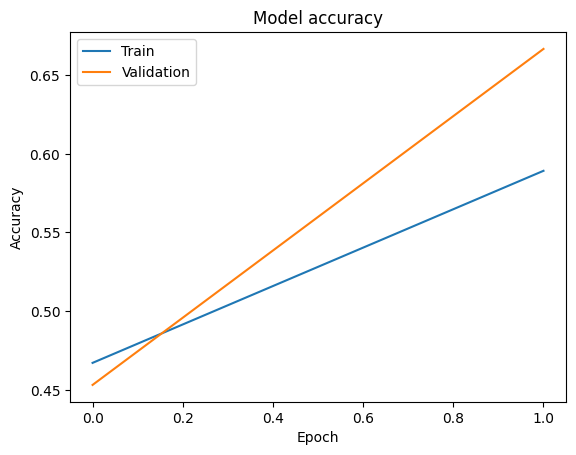

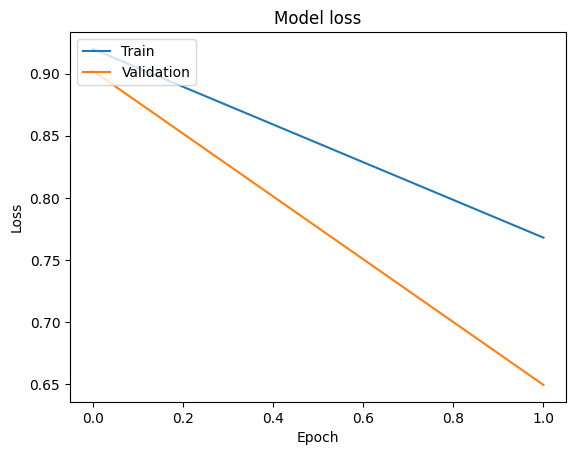

In [8]:
import matplotlib.pyplot as plt

# Assuming 'potato_history' is a variable containing the training history

# Plot training & validation accuracy values
plt.plot(potato_history.history['accuracy'])
plt.plot(potato_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(potato_history.history['loss'])
plt.plot(potato_history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [9]:
#Folders(classes) in 'Dataset' directory
class_name = potato_dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
# Assuming potato_dataset has an attribute called class_names
class_names = potato_dataset.class_names

# Check the number of classes
num_classes = len(class_names)

print("Number of classes:", num_classes)

Number of classes: 3


First Image of batch to predict:


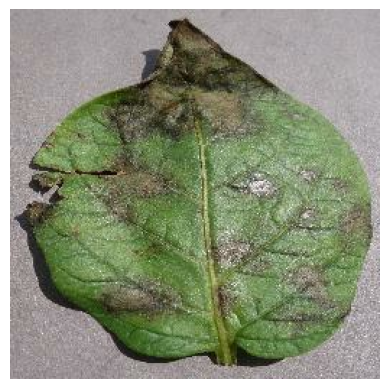

Actual label: Potato___Late_blight
1/1 [==============================] - 1s 1s/step
Predicted label: Potato___Late_blight


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting image
for batch_image, batch_label in potato_train_ds.take(1):  # Assuming potato_train_ds is your training dataset
    first_image = batch_image[0].numpy().astype('uint8')
    first_label = class_name[batch_label[0]]

    print('First Image of batch to predict:')
    plt.imshow(first_image)
    plt.axis('off')
    plt.show()

    print('Actual label:', first_label)

    batch_prediction = potato_model.predict(batch_image)  # Assuming potato_model is your trained model
    predicted_label = class_name[np.argmax(batch_prediction[0])]
    print('Predicted label:', predicted_label)

**INTEGRATION OF BOTH CLASSIFICATION AND NLP MODELS**

In [12]:
# Define a dictionary mapping class labels to disease names
class_name_potato = {
    0: "Potato__Early_Blight",
    1: "Potato__Late_Blight",
    2: "Potato__healthy"
}

def get_disease_name(prediction):
    # Convert numerical class label to disease name using the dictionary
    disease_name = class_name_potato[prediction]
    return disease_name

# Assuming you have the batch_prediction from the image classification model
# Pass the prediction to the function to get the disease name in text format
predicted_disease_name = get_disease_name(np.argmax(batch_prediction[0]))

print("Predicted Disease:", predicted_disease_name)


Predicted Disease: Potato__Late_Blight


**NLP MODEL FOR CAUSES AND RECOMMENDATIONS**

In [14]:
import pandas as pd
# Load the dataset containing causes and recommendations
dataset = pd.read_csv('/content/potato_tomato_disease_recommendations_DF.csv')

In [15]:
dataset

,Disease,Cause,Recommendation
0,Potato__Early_Blight,1-Fungal Pathogen: Early blight is caused by t...,1-Crop Rotation: Rotate potato crops with non-...
1,Potato__Late_Blight,1-Fungal Pathogen: Late blight is caused by th...,1-Resistant Varieties: Plant potato varieties ...
2,Tomato_Early_Blight,1-Fungal Pathogen:Early Blight is caused by th...,1-Crop Rotation:Rotate tomato crops with non-s...
3,Tomato_Late_Blight,1-Favorable Weather Conditions:Late Blight thr...,1-Fungicide Application:Apply fungicides preve...
4,Tomato_Leaf_Mold,1-Fungal Pathogen: Leaf mold is caused by the ...,1-Resistant Varieties: Plant tomato varieties ...
5,Tomato_healthy,healthy,healthy
6,Potato__healthy,healthy,healthy


**EXPLORATORY DATA ANALYSIS**

<ipython-input-16-6f439d271017>:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent clipping of labels


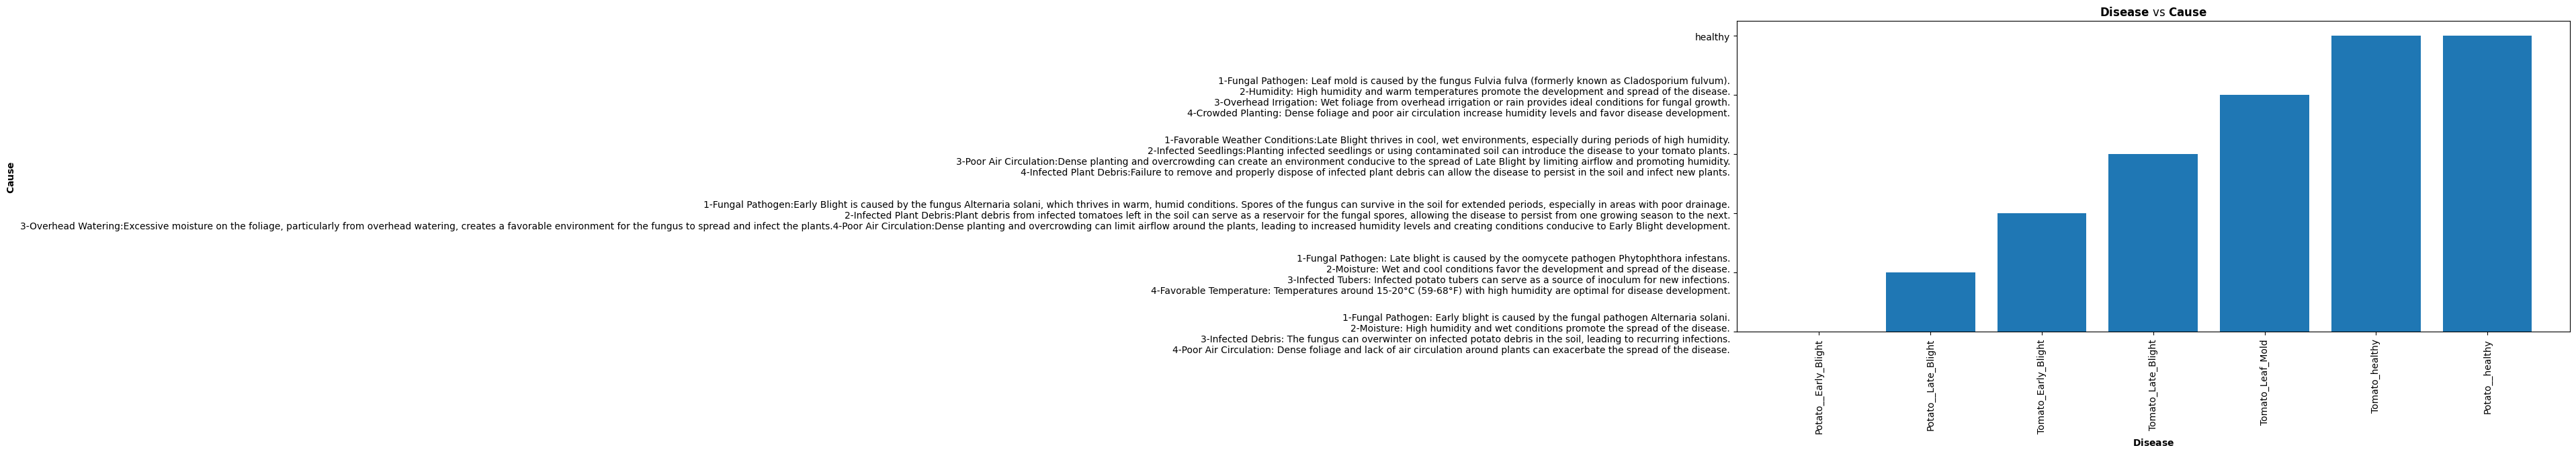

<ipython-input-16-6f439d271017>:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent clipping of labels


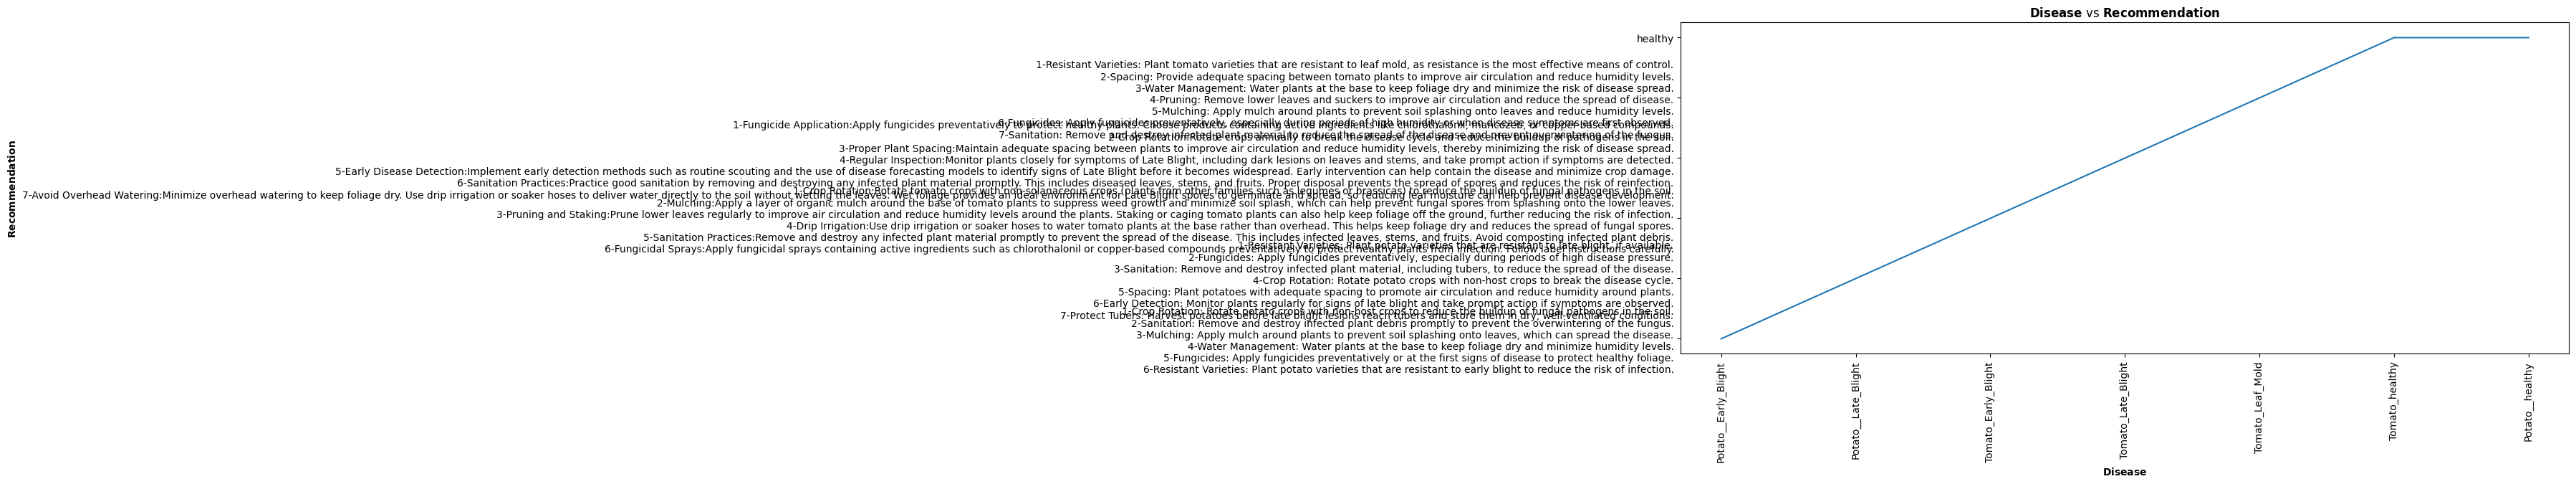

In [16]:
# prompt: Using dataframe dataset: data visualization plots for dataset columns

import pandas as pd
import matplotlib.pyplot as plt
# Increase plot size for Disease vs Cause
plt.figure(figsize=(16, 6))  # Adjust the width and height as needed
plt.bar(dataset['Disease'], dataset['Cause'])
plt.xlabel('$\mathbf{Disease}$')  # Bolden the string 'Disease'
plt.ylabel('$\mathbf{Cause}$')    # Bolden the string 'Cause'
plt.title('$\mathbf{Disease}$ vs $\mathbf{Cause}$')  # Bolden the string 'Disease' and 'Cause'
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Increase plot size for Disease vs Recommendation
plt.figure(figsize=(16, 6))  # Adjust the width and height as needed
plt.plot(dataset['Disease'], dataset['Recommendation'])
plt.xlabel('$\mathbf{Disease}$')  # Bolden the string 'Disease'
plt.ylabel('$\mathbf{Recommendation}$')  # Bolden the string 'Recommendation'
plt.title('$\mathbf{Disease}$ vs $\mathbf{Recommendation}$')  # Bolden the string 'Disease' and 'Recommendation'
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



**NECESSORY LIBRARIES**

In [17]:
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertForSequenceClassification

**USING PRETRAINED BERT MODEL FOR TRAINING ON CUSTOM DATASET**

In [18]:
# Load the pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=6)  # Assuming 6 disease classes

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
# Function to preprocess text and make predictions
def predict(disease_name):
    # Get the class label corresponding to the disease name
    class_label = [k for k, v in class_name_potato.items() if v == disease_name][0]

    # Get causes and recommendations for the disease
    predicted_causes = dataset.loc[dataset['Disease'] == disease_name, 'Cause'].iloc[0]
    predicted_recommendations = dataset.loc[dataset['Disease'] == disease_name, 'Recommendation'].iloc[0]

    return predicted_causes, predicted_recommendations

**PREDICT THE CAUSES AND RECOMMENDATIONS ACCORDING TO RESPECTIVE CLASS**

In [20]:
# Example predicted disease name (you can replace it with the actual prediction from your model)
predicted_disease_name = predicted_disease_name

# Predict causes and recommendations based on predicted disease name
predicted_causes, predicted_recommendations = predict(predicted_disease_name)


In [21]:
print("\n\033[1mDISEASE:\033[0m\n", predicted_disease_name)
print("\n\033[1mCAUSES:\033[0m\n", predicted_causes)
print("\n\033[1mRECOMMENDATIONS:\033[0m\n", predicted_recommendations)


DISEASE:
 Potato__Late_Blight

CAUSES:
 1-Fungal Pathogen: Late blight is caused by the oomycete pathogen Phytophthora infestans.
2-Moisture: Wet and cool conditions favor the development and spread of the disease.
3-Infected Tubers: Infected potato tubers can serve as a source of inoculum for new infections.
4-Favorable Temperature: Temperatures around 15-20°C (59-68°F) with high humidity are optimal for disease development.

RECOMMENDATIONS:
 1-Resistant Varieties: Plant potato varieties that are resistant to late blight, if available.
2-Fungicides: Apply fungicides preventatively, especially during periods of high disease pressure.
3-Sanitation: Remove and destroy infected plant material, including tubers, to reduce the spread of the disease.
4-Crop Rotation: Rotate potato crops with non-host crops to break the disease cycle.
5-Spacing: Plant potatoes with adequate spacing to promote air circulation and reduce humidity around plants.
6-Early Detection: Monitor plants regularly for 

In [35]:
# Save the trained potato classification model
potato_model.save("/content/potato_classification_model")


In [37]:
import tensorflow as tf
from tensorflow.keras import models, layers
from transformers import BertTokenizer, BertForSequenceClassification
import pandas as pd
import numpy as np
import torch

# Constants and configurations
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
NUM_CLASSES_POTATO = 3
POTATO_DATASET_PATH = "/content/extracted_potato/PlantVillage"
DATASET_CSV_PATH = '/content/potato_tomato_disease_recommendations_DF.csv'
model_name = 'bert-base-uncased'

# Define a dictionary mapping class labels to disease names
class_name_potato = {
    0: "Potato__Early_Blight",
    1: "Potato__Late_Blight",
    2: "Potato__healthy"
}

# Load the trained image classification model
image_classification_model = tf.keras.models.load_model('/content/potato_classification_model')

# Load the dataset containing causes and recommendations
dataset = pd.read_csv(DATASET_CSV_PATH)

# Load the pre-trained BERT model and tokenizer for NLP
tokenizer = BertTokenizer.from_pretrained(model_name)
nlp_model = BertForSequenceClassification.from_pretrained(model_name, num_labels=len(dataset))

# Function to preprocess text and make predictions
def predict_causes_recommendations(disease_name):
    # Get the class label corresponding to the disease name
    class_label = [k for k, v in class_name_potato.items() if v == disease_name][0]

    # Get causes and recommendations for the disease
    predicted_causes = dataset.loc[dataset['Disease'] == disease_name, 'Cause'].iloc[0]
    predicted_recommendations = dataset.loc[dataset['Disease'] == disease_name, 'Recommendation'].iloc[0]

    return predicted_causes, predicted_recommendations

# Function to process an image and get disease, causes, and recommendations
def process_image_and_get_predictions(image_path):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch dimension
    img_array = img_array / 255.0  # Rescale pixel values

    # Perform disease classification
    predicted_label = np.argmax(image_classification_model.predict(img_array))

    # Get the disease name from the predicted label
    disease_name = class_name_potato[predicted_label]

    # Predict causes and recommendations based on the disease name
    predicted_causes, predicted_recommendations = predict_causes_recommendations(disease_name)

    return disease_name, predicted_causes, predicted_recommendations

# Save the entire integrated model
image_classification_model.save('whole_model_of_potato')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [39]:
import tensorflow as tf
import numpy as np

# Load the entire integrated model
saved_model_path = '/content/whole_model_of_potato'
loaded_model = tf.keras.models.load_model(saved_model_path)

# Function to process an image and get disease, causes, and recommendations
def process_image_and_get_predictions(image_path):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch dimension
    img_array = img_array / 255.0  # Rescale pixel values

    # Perform inference using the loaded model
    predicted_label = loaded_model.predict(img_array)
    predicted_label_index = np.argmax(predicted_label)

    # Get the disease name from the predicted label
    disease_name = class_name_potato[predicted_label_index]

    # Predict causes and recommendations based on the disease name
    predicted_causes, predicted_recommendations = predict_causes_recommendations(disease_name)

    return disease_name, predicted_causes, predicted_recommendations

# Example usage:
image_path = '/content/extracted_potato/PlantVillage/Potato___Early_blight/009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG'  # Path to new image for inference

# Obtain predictions
disease_name, predicted_causes, predicted_recommendations = process_image_and_get_predictions(image_path)

import matplotlib.pyplot as plt
# Load and display the input image
img = plt.imread(image_path)
plt.imshow(img)
plt.title('Input Image')
plt.axis('off')  # Turn off axis
plt.show()

print("\n\033[1mDISEASE:\033[0m\n", predicted_disease_name)
print("\n\033[1mCAUSES:\033[0m\n", predicted_causes)
print("\n\033[1mRECOMMENDATIONS:\033[0m\n", predicted_recommendations)


1/1 [==============================] - 0s 283ms/step

DISEASE:
 Potato__Late_Blight

CAUSES:
 1-Fungal Pathogen: Late blight is caused by the oomycete pathogen Phytophthora infestans.
2-Moisture: Wet and cool conditions favor the development and spread of the disease.
3-Infected Tubers: Infected potato tubers can serve as a source of inoculum for new infections.
4-Favorable Temperature: Temperatures around 15-20°C (59-68°F) with high humidity are optimal for disease development.

RECOMMENDATIONS:
 1-Resistant Varieties: Plant potato varieties that are resistant to late blight, if available.
2-Fungicides: Apply fungicides preventatively, especially during periods of high disease pressure.
3-Sanitation: Remove and destroy infected plant material, including tubers, to reduce the spread of the disease.
4-Crop Rotation: Rotate potato crops with non-host crops to break the disease cycle.
5-Spacing: Plant potatoes with adequate spacing to promote air circulation and reduce humidity around pla

**MAKING CLASSIFICATION MODEL FOR TOMATO DISEASE CLASSIFICATION**

In [5]:
# Load and preprocess the tomato dataset
tomato_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TOMATO_DATASET_PATH,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    labels='inferred',
    label_mode='int',
)

Found 5452 files belonging to 4 classes.


In [6]:
# Split the tomato dataset into training, validation, and test sets
tomato_train_ds, tomato_val_ds, tomato_test_ds = get_dataset_partitions_tf(tomato_dataset)


In [9]:

# Create and train the tomato model
tomato_model = create_model(NUM_CLASSES_TOMATO)
tomato_history = tomato_model.fit(
    tomato_train_ds,
    epochs=1,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=tomato_val_ds
)

136/136 [==============================] - 683s 5s/step - loss: 1.1852 - accuracy: 0.4568 - val_loss: 1.0756 - val_accuracy: 0.5772


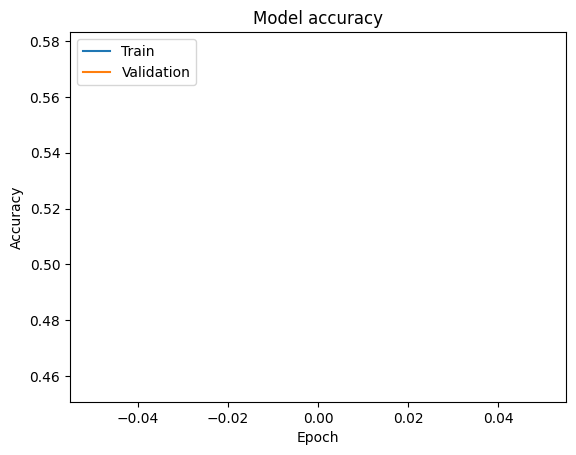

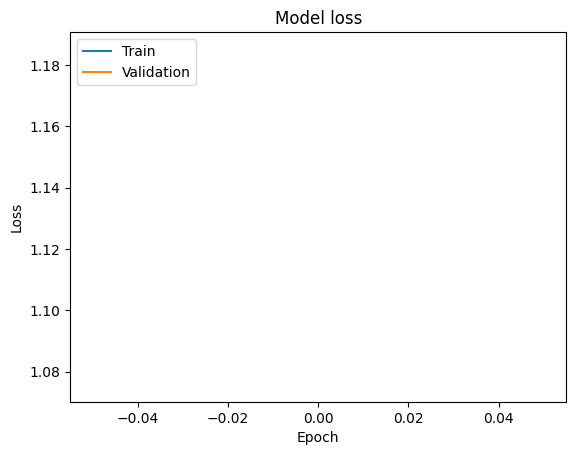

In [10]:
import matplotlib.pyplot as plt

# Assuming 'potato_history' is a variable containing the training history

# Plot training & validation accuracy values
plt.plot(tomato_history.history['accuracy'])
plt.plot(tomato_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(tomato_history.history['loss'])
plt.plot(tomato_history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [12]:
# Save the tomato model
tomato_model.save('tomato_classification_model')

In [13]:
class_names = tomato_dataset.class_names
print(class_names)

['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_healthy']


In [14]:
import numpy as np

# Assuming 'test_ds' is the test dataset
predicted_labels = []  # Initialize an array to store predicted labels


First image to predict:


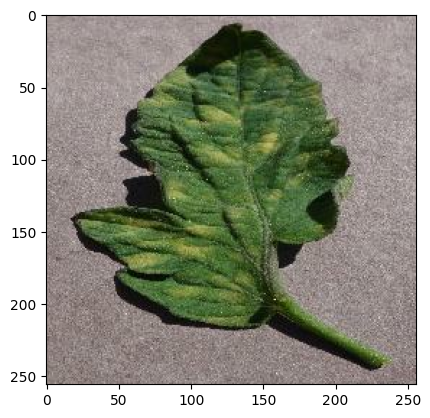

Actual label:  Tomato_Leaf_Mold
1/1 [==============================] - 2s 2s/step
Predicted label: Tomato_healthy
Array of Predicted Labels: [3]


In [17]:
for images_batch, labels_batch in tomato_test_ds.take(1):
    # Get the first image and label
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    # Print and display the first image and actual label
    print("First image to predict:")
    plt.imshow(first_image)
    plt.show()
    print("Actual label: ", class_names[first_label])

    # Make predictions for the entire batch
    batch_predictions = tomato_model.predict(images_batch)

    # Get and print the predicted label for the first image in the batch
    predicted_label = np.argmax(batch_predictions[0])
    print("Predicted label:", class_names[predicted_label])

    # Append the predicted label to the array
    predicted_labels.append(predicted_label)

# Convert the array to a NumPy array for further analysis
predicted_labels_array = np.array(predicted_labels)

# Print the array of predicted labels
print("Array of Predicted Labels:", predicted_labels_array)

**INTEGRATION OF BOTH CLASSIFICATION AND NLP MODELS**

In [18]:
import numpy as np

# Define a dictionary mapping class labels to disease names for tomatoes
class_name_tomato = {
    0: "Tomato_Early_Blight",
    1: "Tomato_Late_Blight",
    2: "Tomato_Leaf_Mold",
    3: "Tomato_healthy"
}

def get_disease_name(prediction):
    # Convert numerical class label to disease name using the dictionary
    disease_name = class_name_tomato[prediction]
    return disease_name

# Assuming you have the batch_predictions from the image classification model
# Pass the prediction to the function to get the disease name in text format
predicted_disease_name = get_disease_name(np.argmax(batch_predictions[0]))

print("Predicted Disease:", predicted_disease_name)

Predicted Disease: Tomato_healthy


In [23]:

import pandas as pd

# Load the dataset containing causes, recommendations, and disease labels
dataset = pd.read_csv('/content/potato_tomato_disease_recommendations_DF.csv')

In [24]:
dataset

,Disease,Cause,Recommendation
0,Potato__Early_Blight,1-Fungal Pathogen: Early blight is caused by t...,1-Crop Rotation: Rotate potato crops with non-...
1,Potato__Late_Blight,1-Fungal Pathogen: Late blight is caused by th...,1-Resistant Varieties: Plant potato varieties ...
2,Tomato_Early_Blight,1-Fungal Pathogen:Early Blight is caused by th...,1-Crop Rotation:Rotate tomato crops with non-s...
3,Tomato_Late_Blight,1-Favorable Weather Conditions:Late Blight thr...,1-Fungicide Application:Apply fungicides preve...
4,Tomato_Leaf_Mold,1-Fungal Pathogen: Leaf mold is caused by the ...,1-Resistant Varieties: Plant tomato varieties ...
5,Tomato_healthy,healthy,healthy
6,Potato__healthy,healthy,healthy


**EXPLORATORY DATA ANALYSIS**

<ipython-input-25-6f439d271017>:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent clipping of labels


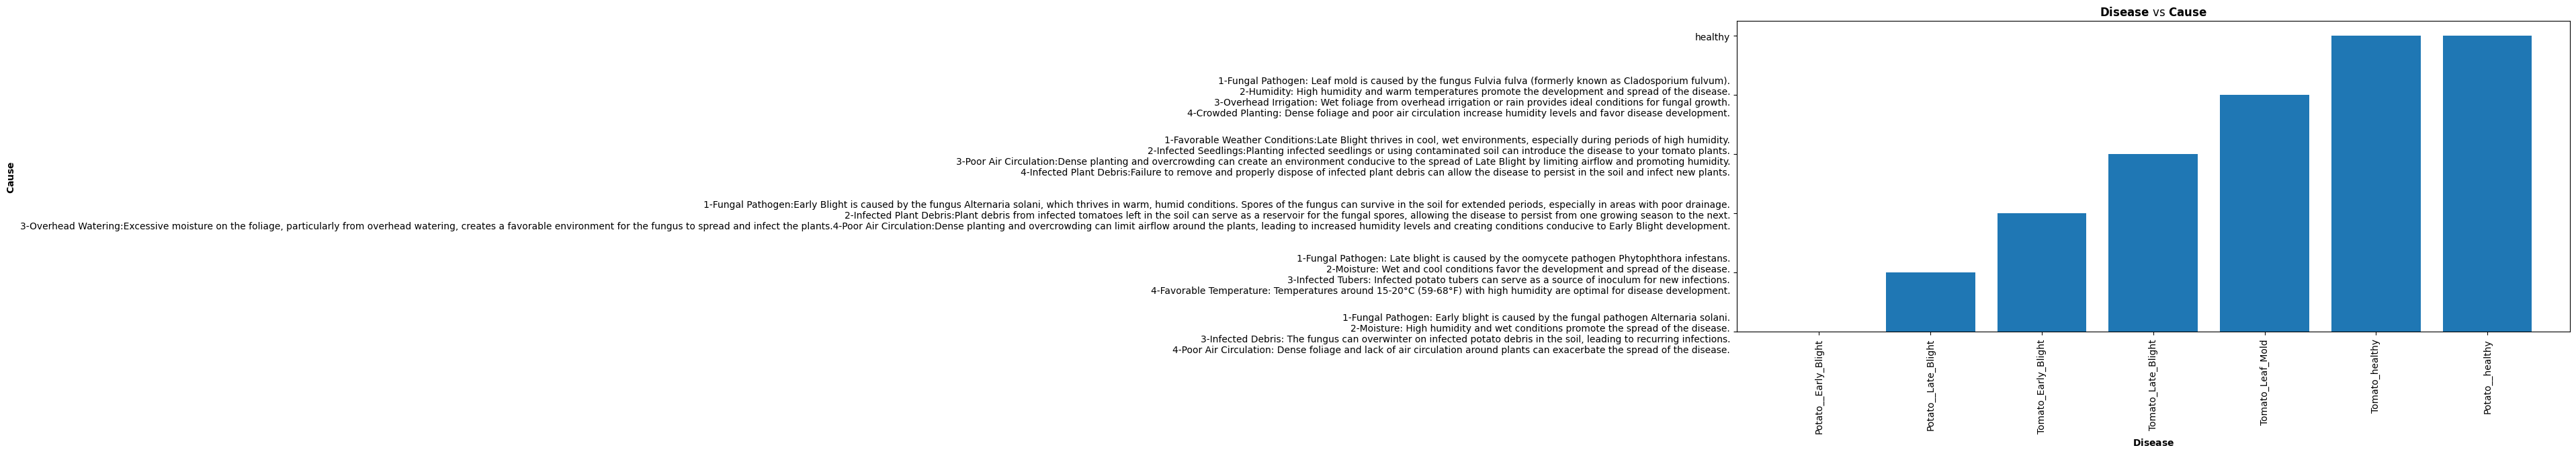

<ipython-input-25-6f439d271017>:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent clipping of labels


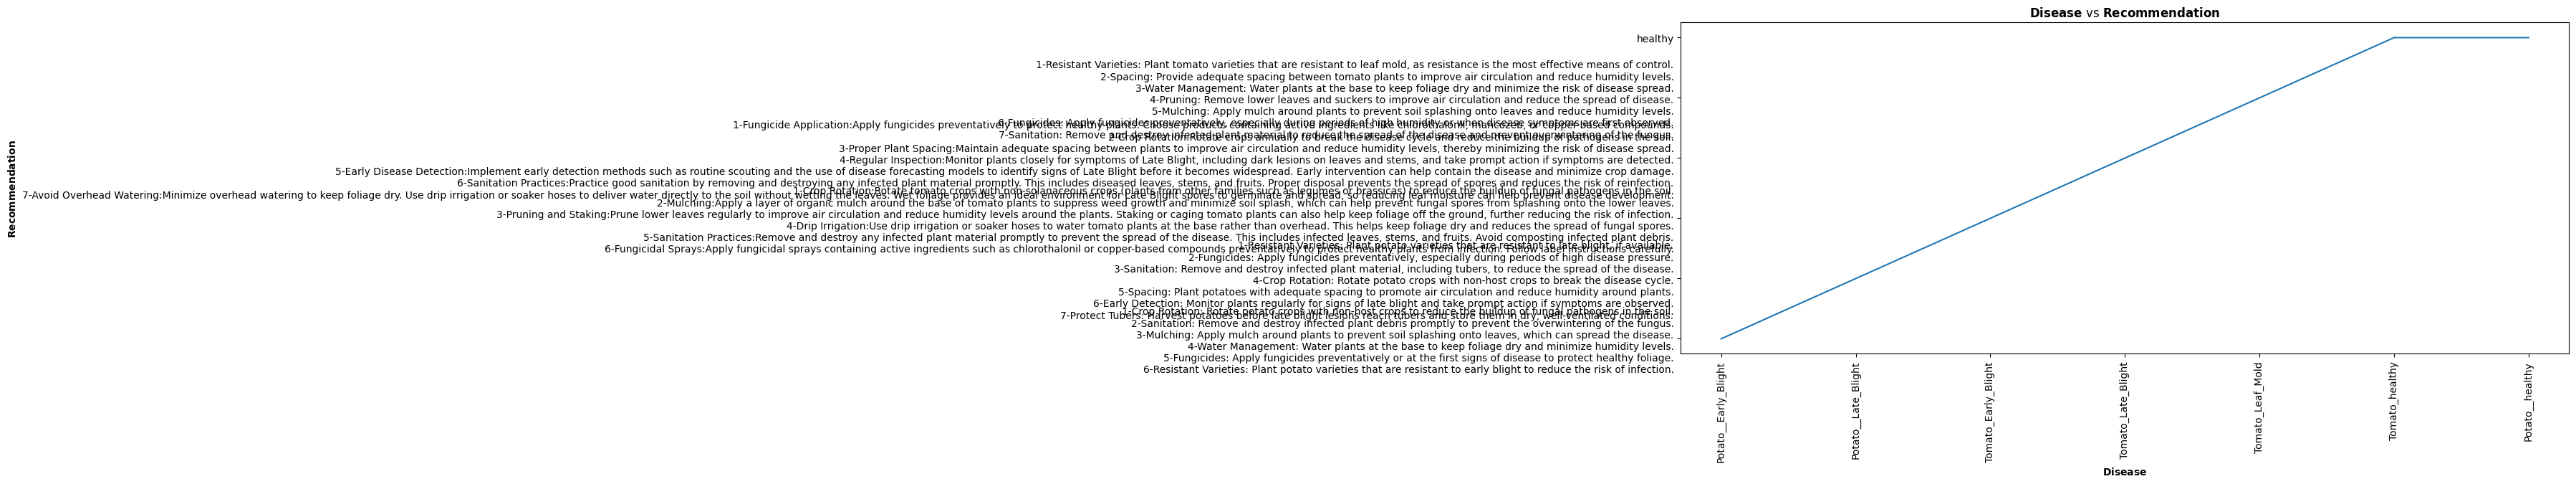

In [25]:
# prompt: Using dataframe dataset: data visualization plots for dataset columns

import pandas as pd
import matplotlib.pyplot as plt
# Increase plot size for Disease vs Cause
plt.figure(figsize=(16, 6))  # Adjust the width and height as needed
plt.bar(dataset['Disease'], dataset['Cause'])
plt.xlabel('$\mathbf{Disease}$')  # Bolden the string 'Disease'
plt.ylabel('$\mathbf{Cause}$')    # Bolden the string 'Cause'
plt.title('$\mathbf{Disease}$ vs $\mathbf{Cause}$')  # Bolden the string 'Disease' and 'Cause'
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Increase plot size for Disease vs Recommendation
plt.figure(figsize=(16, 6))  # Adjust the width and height as needed
plt.plot(dataset['Disease'], dataset['Recommendation'])
plt.xlabel('$\mathbf{Disease}$')  # Bolden the string 'Disease'
plt.ylabel('$\mathbf{Recommendation}$')  # Bolden the string 'Recommendation'
plt.title('$\mathbf{Disease}$ vs $\mathbf{Recommendation}$')  # Bolden the string 'Disease' and 'Recommendation'
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



**IMPORTING NECESSORY LIBRARIES**

In [26]:
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertForSequenceClassification

**USING PRETRAINED BERT MODEL FOR TRAINING ON CUSTOM DATASET**

In [27]:
# Load the pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=4)  # Assuming 4 tomato disease classes

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:

# Function to preprocess text and make predictions
def predict(disease_name):
    # Get the class label corresponding to the disease name
    class_label = [k for k, v in class_name_tomato.items() if v == disease_name][0]

    # Get causes and recommendations for the disease
    predicted_causes = dataset.loc[dataset['Disease'] == disease_name, 'Cause'].iloc[0]
    predicted_recommendations = dataset.loc[dataset['Disease'] == disease_name, 'Recommendation'].iloc[0]

    return predicted_causes, predicted_recommendations

**PREDICT THE CAUSES AND RECOMMENDATIONS ACCORDING TO RESPECTIVE CLASS**

In [31]:

# Function to preprocess text and make predictions
def predict(disease_name):
    # Get the class label corresponding to the disease name
    class_label = [k for k, v in class_name_tomato.items() if v == disease_name][0]

    # Get causes and recommendations for the disease
    predicted_causes = dataset.loc[dataset['Disease'] == disease_name, 'Cause'].iloc[0]
    predicted_recommendations = dataset.loc[dataset['Disease'] == disease_name, 'Recommendation'].iloc[0]

    return predicted_causes, predicted_recommendations

In [34]:

# Example predicted disease name (you can replace it with the actual prediction from your model)
predicted_disease_name = predicted_disease_name # Replace this with the actual predicted disease name

# Predict causes and recommendations based on predicted disease name
predicted_causes, predicted_recommendations = predict(predicted_disease_name)


In [35]:
print("\n\033[1mDISEASE:\033[0m\n", predicted_disease_name)
print("\n\033[1mCAUSES:\033[0m\n", predicted_causes)
print("\n\033[1mRECOMMENDATIONS:\033[0m\n", predicted_recommendations)


DISEASE:
 Tomato_healthy

CAUSES:
 healthy

RECOMMENDATIONS:
 healthy


In [36]:
import tensorflow as tf
from tensorflow.keras import models, layers
from transformers import BertTokenizer, BertForSequenceClassification
import pandas as pd
import numpy as np
import torch

# Constants and configurations
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
NUM_CLASSES_TOMATO = 4
TOMATO_DATASET_PATH = "/content/extracted_tomato/Tomato data"
DATASET_CSV_PATH = '/content/potato_tomato_disease_recommendations_DF.csv'
model_name = 'bert-base-uncased'

# Define a dictionary mapping class labels to disease names
class_name_tomato = {
    0: "Tomato_Early_Blight",
    1: "Tomato_Late_Blight",
    2: "Tomato_Leaf_Mold",
    3: "Tomato_healthy"
}

# Load the trained image classification model
image_classification_model = tf.keras.models.load_model('/content/tomato_classification_model')

# Load the dataset containing causes and recommendations
dataset = pd.read_csv(DATASET_CSV_PATH)

# Load the pre-trained BERT model and tokenizer for NLP
tokenizer = BertTokenizer.from_pretrained(model_name)
nlp_model = BertForSequenceClassification.from_pretrained(model_name, num_labels=len(dataset))

# Function to preprocess text and make predictions
def predict_causes_recommendations(disease_name):
    # Get the class label corresponding to the disease name
    class_label = [k for k, v in class_name_tomato.items() if v == disease_name][0]

    # Get causes and recommendations for the disease
    predicted_causes = dataset.loc[dataset['Disease'] == disease_name, 'Cause'].iloc[0]
    predicted_recommendations = dataset.loc[dataset['Disease'] == disease_name, 'Recommendation'].iloc[0]

    return predicted_causes, predicted_recommendations

# Function to process an image and get disease, causes, and recommendations
def process_image_and_get_predictions(image_path):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch dimension
    img_array = img_array / 255.0  # Rescale pixel values

    # Perform disease classification
    predicted_label = np.argmax(image_classification_model.predict(img_array))

    # Get the disease name from the predicted label
    disease_name = class_name_tomato[predicted_label]

    # Predict causes and recommendations based on the disease name
    predicted_causes, predicted_recommendations = predict_causes_recommendations(disease_name)

    return disease_name, predicted_causes, predicted_recommendations

# Save the entire integrated model
image_classification_model.save('whole_model_of_tomato')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


1/1 [==============================] - 0s 267ms/step


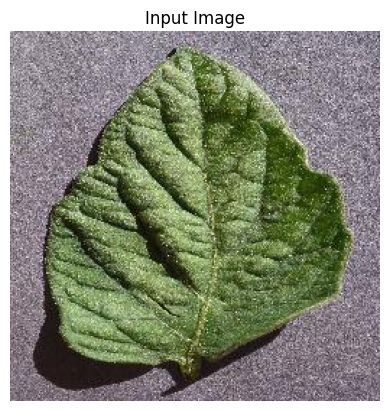


DISEASE:
 Tomato_Late_Blight

CAUSES:
 1-Favorable Weather Conditions:Late Blight thrives in cool, wet environments, especially during periods of high humidity.
2-Infected Seedlings:Planting infected seedlings or using contaminated soil can introduce the disease to your tomato plants.
3-Poor Air Circulation:Dense planting and overcrowding can create an environment conducive to the spread of Late Blight by limiting airflow and promoting humidity.
4-Infected Plant Debris:Failure to remove and properly dispose of infected plant debris can allow the disease to persist in the soil and infect new plants.

RECOMMENDATIONS:
 1-Fungicide Application:Apply fungicides preventatively to protect healthy plants. Choose products containing active ingredients like chlorothalonil, mancozeb, or copper-based compounds.
2-Crop Rotation:Rotate crops annually to break the disease cycle and reduce the buildup of pathogens in the soil.
3-Proper Plant Spacing:Maintain adequate spacing between plants to improv

In [41]:
import tensorflow as tf
import numpy as np

# Load the entire integrated model
saved_model_path = '/content/whole_model_of_tomato'
loaded_model = tf.keras.models.load_model(saved_model_path)

# Function to process an image and get disease, causes, and recommendations
def process_image_and_get_predictions(image_path):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch dimension
    img_array = img_array / 255.0  # Rescale pixel values

    # Perform inference using the loaded model
    predicted_label = loaded_model.predict(img_array)
    predicted_label_index = np.argmax(predicted_label)

    # Get the disease name from the predicted label
    disease_name = class_name_tomato[predicted_label_index]

    # Predict causes and recommendations based on the disease name
    predicted_causes, predicted_recommendations = predict_causes_recommendations(disease_name)

    return disease_name, predicted_causes, predicted_recommendations

# Example usage:
image_path = '/content/extracted_tomato/Tomato data/Tomato_healthy/00bce074-967b-4d50-967a-31fdaa35e688___RS_HL 0223.JPG'  # Path to new image for inference

# Obtain predictions
disease_name, predicted_causes, predicted_recommendations = process_image_and_get_predictions(image_path)
import matplotlib.pyplot as plt

# Load and display the input image
img = plt.imread(image_path)
plt.imshow(img)
plt.title('Input Image')
plt.axis('off')  # Turn off axis
plt.show()

print("\n\033[1mDISEASE:\033[0m\n", disease_name)
print("\n\033[1mCAUSES:\033[0m\n", predicted_causes)
print("\n\033[1mRECOMMENDATIONS:\033[0m\n", predicted_recommendations)
